# Text classification using Naive Bayes
* Preprocessing steps required for text classification
* Building a Naive Bayes classifier for text classifier
* Predict text categories using classifer models
* Evaluating the models using various metrics


In [ ]:
import nltk, pandas as pd, numpy as np
# Visualization
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

# Text Cleaning
from gensim.parsing.porter import PorterStemmer
from gensim.parsing.preprocessing import remove_stopwords

# Feature extraction
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Model Building
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, f1_score 

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
downloaded = drive.CreateFile({'id':'1Qywia1SPxzzlTt8nloZbM8R5l_GNql66'}) # replace the id with id of file you want to access
downloaded.GetContentFile('sms_spam_detection.csv') 

In [ ]:

data = pd.read_csv('sms_spam_detection.csv', encoding='Latin')
data.head()

,target,sms_text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
data['target'].value_counts(normalize=True)*100

ham     86.593683
spam    13.406317
Name: target, dtype: float64

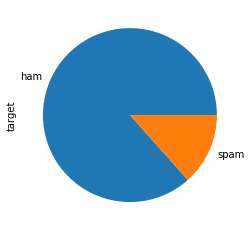

In [ ]:
data['target'].value_counts().plot.pie()

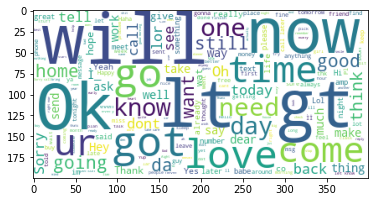

In [ ]:
ham_sms = data[data['target']=='ham']
wc = WordCloud(background_color='white').generate(' '.join(ham_sms['sms_text']))
plt.imshow(wc)

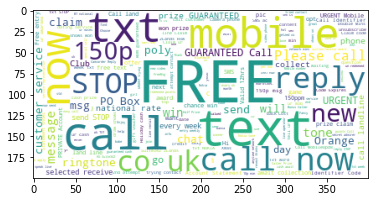

In [ ]:
spam_sms = data[data['target']=='spam']
wc2 = WordCloud(background_color='white').generate(' '.join(spam_sms['sms_text']))
plt.imshow(wc2)

## Text Cleaning

In [ ]:
stemmer = PorterStemmer()
docs_clean = data['sms_text'].str.lower() # Lower Case
docs_clean = docs_clean.str.replace('-', ' ').str.replace('[^\w+\s]', '') # Regex Cleaning
docs_clean = docs_clean.apply(lambda x : remove_stopwords(x)) # stopwords removal
docs_clean = stemmer.stem_documents(docs_clean) # Stem docs
docs_clean[:5]

['jurong point crazi avail bugi n great world la e buffet cine got amor wat',
 'ok lar joke wif u oni',
 'free entri 2 wkly comp win fa cup final tkt 21st 2005 text fa 87121 receiv entri questionstd txt ratetc appli 08452810075over18',
 'u dun earli hor u c',
 'nah dont think goe usf live']

In [ ]:
data['docs_clean'] = docs_clean
data['target_col'] = data['target']
xtrain, xtest, ytrain, ytest = train_test_split(data['docs_clean'],
                                                data['target_col'],
                                                test_size=.20,
                                                random_state=1)

print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(4457,)
(1115,)
(4457,)
(1115,)


# Scores using Count Vectorizer

In [ ]:
vectorizer = CountVectorizer().fit(xtrain)

In [ ]:
train_dtm = vectorizer.transform(xtrain)

In [ ]:
test_dtm = vectorizer.transform(xtest)

In [ ]:
model = MultinomialNB().fit(train_dtm, ytrain)

In [ ]:
sentiment_pred = model.predict(test_dtm)
sentiment_pred

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [ ]:
print('Accuracy Score:',accuracy_score(ytest, sentiment_pred))
print('F1 Score:', f1_score(ytest, sentiment_pred, pos_label='spam'))

Accuracy Score: 0.9820627802690582
F1 Score: 0.9264705882352942


# Scores using TfidfVectorizer model

In [ ]:
vectorizer2 = TfidfVectorizer().fit(xtrain)
train_dtm2 = vectorizer2.transform(xtrain)
test_dtm2 = vectorizer2.transform(xtest)
model = MultinomialNB().fit(train_dtm2, ytrain)
sentiment_pred2 = model.predict(test_dtm2)
sentiment_pred2

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [ ]:
print('Accuracy Score:',accuracy_score(ytest, sentiment_pred2))
print('F1 Score:', f1_score(ytest, sentiment_pred2, pos_label='spam'))

Accuracy Score: 0.9730941704035875
F1 Score: 0.8799999999999999
